# Football stock euphoria? 

I once heard a story of a guy who did the following: whenever the danish football season ended he bought up football stocks for danish listed football clubs, and then sold these again before the season then started again. Apparently this strategy should have worked well for him with the argument that football fans are euphoric up untill the start of the season thinking "this season we will win!". In this short article I will be testing whether there is any meaning to this. Spoiler alert: if there is I will probably not have this article as part of my Github repositories (sorry). 

In [50]:
# I have downloaded daily stock price data for the last 20 years for the danish football club Brøndby IF.
# Let us load this data into a dataframe

In [51]:
import pandas as pd
df = pd.read_csv("BIF-daily-returns.csv")

In [52]:
# Taking a look at our data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,03/01/2002,10.612131,10.612131,10.438162,10.438162,10.438162,10783,0.041667
1,04/01/2002,10.786101,10.873085,10.786101,10.873085,10.873085,5173,-0.024000
2,07/01/2002,10.438162,10.699116,10.438162,10.612131,10.612131,26337,-0.049180
3,08/01/2002,10.264193,10.264193,10.090223,10.090223,10.090223,13283,0.000000
4,09/01/2002,10.090223,10.090223,9.655300,10.090223,10.090223,52371,0.000000
...,...,...,...,...,...,...,...,...
5272,28/11/2022,0.545000,0.547000,0.540000,0.541000,0.541000,196125,0.007394
5273,29/11/2022,0.541000,0.545000,0.540000,0.545000,0.545000,78395,-0.009174
5274,30/11/2022,0.544000,0.545000,0.540000,0.540000,0.540000,187698,0.007407
5275,01/12/2022,0.540000,0.545000,0.531000,0.544000,0.544000,832741,-0.007353


In [53]:
# We should only care about date and the daily return so lets drop the remaining parts

In [54]:
df = df.drop(["Open", "High", "Low", "Close", "Adj Close", "Volume"], axis=1)
df = df.dropna()

In [55]:
df.head()

,Date,Returns
0,03/01/2002,0.041667
1,04/01/2002,-0.024000
2,07/01/2002,-0.049180
3,08/01/2002,0.000000
4,09/01/2002,0.000000


<AxesSubplot:title={'center':'Daily returns BIF'}>

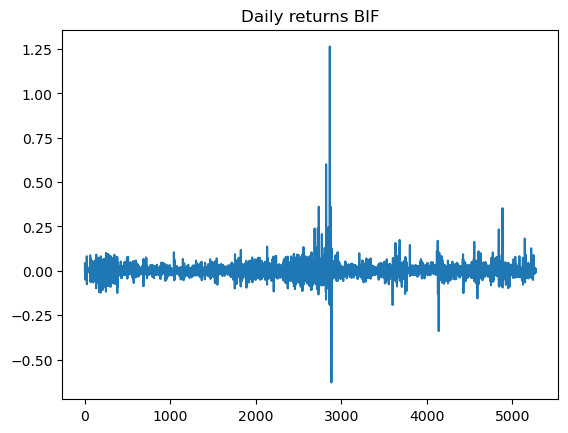

In [56]:
# Plotting daily returns

from matplotlib import pyplot as plt 

%matplotlib inline

df["Returns"].plot(title="Daily returns BIF")

In [57]:
# It seems like we have a very extreme observation for one of the days, so lets get rid of this

df.drop(df.loc[df['Returns']>1.2].index, inplace=True)

In [58]:
# Let us now split our dataset into two different parts to compare them.
# We will need to work with months, so let us first split the dataframe date format so that we have months isolated

In [59]:
df[['Day','Month', 'Year']] = df['Date'].str.split('/',expand=True)
df.head()

,Date,Returns,Day,Month,Year
0,03/01/2002,0.041667,03,01,2002
1,04/01/2002,-0.024000,04,01,2002
2,07/01/2002,-0.049180,07,01,2002
3,08/01/2002,0.000000,08,01,2002
4,09/01/2002,0.000000,09,01,2002


In [60]:
df1 = df.loc[df["Month"].isin(["04", "05", "06"])]
df2 = df.loc[df["Month"].isin(["01", "02", "03", "07", "08", "09", "10", "11", "12"])]
df1.head(), df2.head()

(          Date   Returns Day Month  Year
 62  01/04/2002  0.087719  01    04  2002
 63  02/04/2002  0.024194  02    04  2002
 64  03/04/2002  0.039370  03    04  2002
 65  04/04/2002  0.068182  04    04  2002
 66  05/04/2002 -0.063830  05    04  2002,
          Date   Returns Day Month  Year
 0  03/01/2002  0.041667  03    01  2002
 1  04/01/2002 -0.024000  04    01  2002
 2  07/01/2002 -0.049180  07    01  2002
 3  08/01/2002  0.000000  08    01  2002
 4  09/01/2002  0.000000  09    01  2002)

In [61]:
# We now have two datasets we can compare. One for the period after and up untill the season start and one during the season.

<BarContainer object of 2 artists>

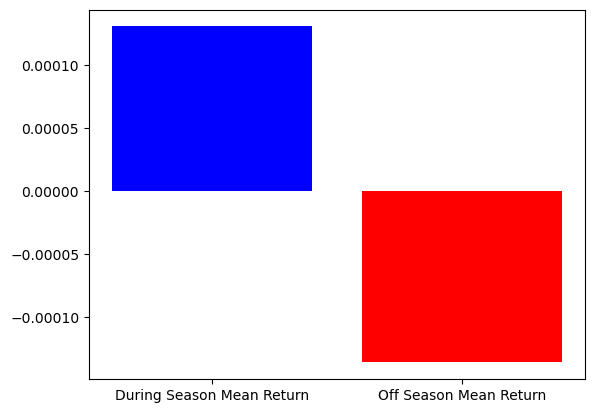

In [62]:
# Creating data for a mean return bar plot to see if there are any meaningful deviations

x = ["During Season Mean Return", "Off Season Mean Return"]
y = []

during_season_returns = df1["Returns"].mean()
off_season_returns = df2["Returns"].mean()

y.append(during_season_returns)
y.append(off_season_returns)

plt.bar(x,y, color = ["blue", "red"])

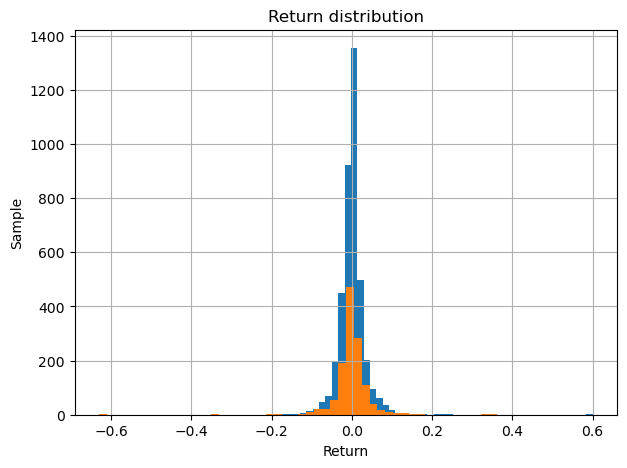

In [63]:
# Creating a histogram plot to see if there is deviations of return distribution

%matplotlib inline
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(1, 1, 1)
df2['Returns'].hist(bins=50, ax=ax1)
df1['Returns'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('Return distribution')
plt.show()

In [64]:
# Okay so it might seem like we actually have a higher return when buying in the off season.
# Let us backtest the strategy with a balance. First, take a look at the graphs

Text(0.5, 1.0, 'Wealth development of the two strategies')

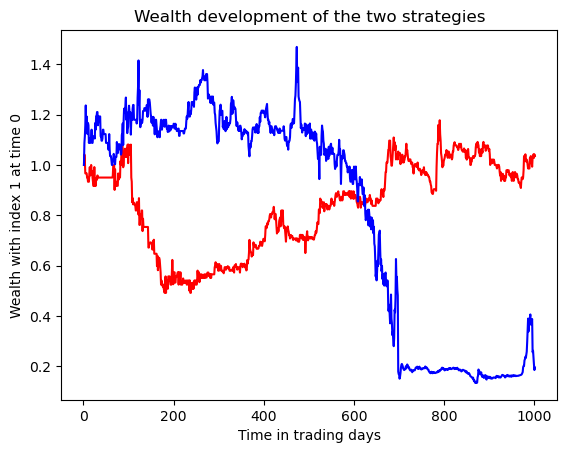

In [65]:
# Initializing wealth as a list containing the start wealth only 

wealth_off = [1]
wealth_season = [1]

# Creating lists with the returns for each period from our dataframes

off_season_returns = df1["Returns"].values.tolist()
in_season_returns = df2["Returns"].values.tolist()

# Calculating wealth from each time iteration. Note that we do it only for t = 1000 even though we have more data. 

for i in range(1000):
    wealth_off.append((1+off_season_returns[i])*wealth_off[i])
    
for i in range(1000):
    wealth_season.append((1+in_season_returns[i])*wealth_season[i])

# Creating emtpy lists for time on our plot's x-axis and appending with lenght of wealth-data
    
time_off = []
time_season = []
    
for i in range(len(wealth_off)):
    i = i + 1
    time_off.append(i)
    
for i in range(len(wealth_season)):
    i = i + 1 
    time_season.append(i)
    
# Plotting our data

plt.plot(time_season, wealth_season, color="red")
plt.plot(time_off, wealth_off, color="blue")
plt.xlabel("Time in trading days")
plt.ylabel("Wealth with index 1 at time 0")
plt.title("Wealth development of the two strategies")

# Conclusion 

It definitely seems like this trading strategy is not doable, and the guy I heard about might have just been lucky.

I must say I thought this might actually work when I saw the positive mean return (the bar chart). However, when looking at the simulated wealth development of the strategies it becomes apparent that it cannot be done. 

However, steps could of course be taken towards perfecting this analysis. I have perhaps divided the time periods way too roughly as seasons might also start/stop at different times. Also, I am only looking at data for one football club while a more rigerous analysis would have to include multiple. 